# Final Project

## Loading libraries and Dataset

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import re, string
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("/Users/Lenovo/Desktop/Education/Winter term/COSC-274/dartmouth-cosc-74274-w23-session1-part1/training.csv")

test_df = pd.read_csv("/Users/Lenovo/Desktop/Education/Winter term/COSC-274/dartmouth-cosc-74274-w23-session1-part1/test.csv")

print(train_df.shape)
print(test_df.shape)

(29189, 13)
(4500, 12)


In [3]:
train_df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,category
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,2.0,NaN,{'Size:': ' Polaris H4'},automotive
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,NaN,NaN,NaN,automotive
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,NaN,NaN,NaN,automotive
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,NaN,NaN,"{'Color:': ' Clear', 'Style:': ' 45 Degree'}",automotive
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,NaN,NaN,NaN,automotive


## Check for Missing Values

In [4]:
train_df.isna().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          4
reviewText            0
summary               5
unixReviewTime        0
vote              23142
image             28589
style             13824
category              0
dtype: int64

In [5]:
na_vote = train_df['vote'].isna().sum()/len(train_df['vote'])
image_na = train_df['image'].isna().sum()/len(train_df['image'])
style_na = train_df['style'].isna().sum()/len(train_df['style'])

print("Missing Values in Vote : {}".format(na_vote))
print("Missing Values in Image : {}".format(image_na))
print("Missing Values in Style : {}".format(style_na))

Missing Values in Vote : 0.792832916509644
Missing Values in Image : 0.9794443112131282
Missing Values in Style : 0.47360306964952553


## Removing Unnecessary Columns

In [6]:
train_df = train_df.drop('vote', axis=1)
train_df = train_df.drop('image', axis=1)
train_df = train_df.drop('style', axis=1)

train_df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,automotive
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,automotive
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,automotive
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,automotive
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,automotive


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29189 entries, 0 to 29188
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         29189 non-null  int64 
 1   verified        29189 non-null  bool  
 2   reviewTime      29189 non-null  object
 3   reviewerID      29189 non-null  object
 4   asin            29189 non-null  object
 5   reviewerName    29185 non-null  object
 6   reviewText      29189 non-null  object
 7   summary         29184 non-null  object
 8   unixReviewTime  29189 non-null  int64 
 9   category        29189 non-null  object
dtypes: bool(1), int64(2), object(7)
memory usage: 2.0+ MB


## Data Processing

1. The **overall** column is our target variable and it contains numbers from 1 to 5, so based on certain thresholds we will create a new column and put in values like Good, Bad, etc for binary classification.
2. We will then apply some basic NLP techniques in **reviewText** column to get important features.

In [8]:
train_df['productReview'] = train_df['overall'].apply(lambda z: 0 if z <=3 else 1)
train_df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,productReview
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,automotive,0
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,automotive,0
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,automotive,0
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,automotive,0
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,automotive,0


In [9]:
train_df = train_df.dropna()

## Checking Class Distribution

We will explore the class distribution of **productReview** column to see whether the dataset is imbalanced or not, based on this we will apply the cross-validation techniques.

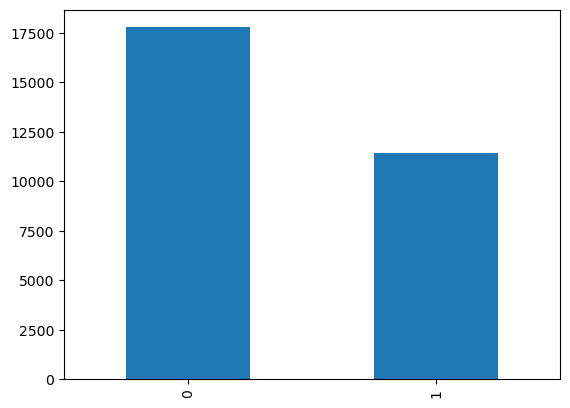

In [10]:
binary_labels = train_df['productReview'].value_counts()

binary_labels.plot.bar()
plt.show()

In [11]:
## preprocess the dataset

def preprocessing(t):
    t = t.lower()
    
    #removing punctuations
    t = t.translate(str.maketrans('','',string.punctuation))
    
    #removing digits
    t = re.sub(r'\d','', t)
    
    #removing whitespaces
    t = t.strip()
    
    return t

train_df['reviewText'] = train_df['reviewText'].apply(preprocessing)

In [12]:
stop_words = ['a', 'an', 'the', 'and', 'but', 'or', 'if', 'because', 'as', 'at', 
              'by', 'for', 'from', 'in', 'into', 'of', 'off', 'on', 
              'onto', 'out', 'over', 'to', 'up', 'with']

train_df['reviewText'] = train_df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Binary Classification

In [13]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

x = train_df['reviewText']
y = train_df['productReview']

cv = CountVectorizer()
tfidf = TfidfVectorizer(ngram_range=(1,2))

# x_transformed = cv.fit_transform(x)

x_transformed = tfidf.fit_transform(x)


## Logistic Regression

In [14]:
xtrain, xval, ytrain, yval = train_test_split(x_transformed, y, test_size=0.2, random_state=0)

In [15]:
# Model 1
lr_params = {'C':[0.2,0.4,0.6,0.8,1], 'penalty':['l2','l1']}
lr = LogisticRegression(class_weight='balanced')
random_lr_model = GridSearchCV(lr, lr_params,cv=5, scoring="f1_macro")
random_lr_model.fit(x_transformed,y)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.2, 0.4, 0.6, 0.8, 1], 'penalty': ['l2', 'l1']},
             scoring='f1_macro')

In [16]:
# scores = cross_val_score(model, x_transformed, y, cv=5, error_score='raise')
# scores.mean()

print('Best Score : {}'.format(random_lr_model.best_score_))
print("Best Parameter : {}".format(random_lr_model.best_params_))

Best Score : 0.792789718481937
Best Parameter : {'C': 1, 'penalty': 'l2'}


In [19]:
print('Score : {}'.format(random_lr_model.cv_results_['mean_test_score']))
print("Parameter : {}".format(random_lr_model.cv_results_['params']))

Score : [0.77876345        nan 0.78531802        nan 0.78923311        nan
 0.79114667        nan 0.79278972        nan]
Parameter : [{'C': 0.2, 'penalty': 'l2'}, {'C': 0.2, 'penalty': 'l1'}, {'C': 0.4, 'penalty': 'l2'}, {'C': 0.4, 'penalty': 'l1'}, {'C': 0.6, 'penalty': 'l2'}, {'C': 0.6, 'penalty': 'l1'}, {'C': 0.8, 'penalty': 'l2'}, {'C': 0.8, 'penalty': 'l1'}, {'C': 1, 'penalty': 'l2'}, {'C': 1, 'penalty': 'l1'}]


In [17]:
lr_model = LogisticRegression(C=1, class_weight='balanced', penalty='l2')
lr_model.fit(xtrain, ytrain)

ypred = lr_model.predict(xval)
ypred_proba = lr_model.predict_proba(xval)

cfr = classification_report(yval, ypred)
auc = roc_auc_score(yval, ypred)

print("ROC AUC Score : {}".format(auc))
print('Classification Report:\n{}'.format(cfr))

ROC AUC Score : 0.813665693857627
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3583
           1       0.75      0.79      0.77      2253

    accuracy                           0.82      5836
   macro avg       0.81      0.81      0.81      5836
weighted avg       0.82      0.82      0.82      5836



Text(0, 0.5, 'True Positives Rate')

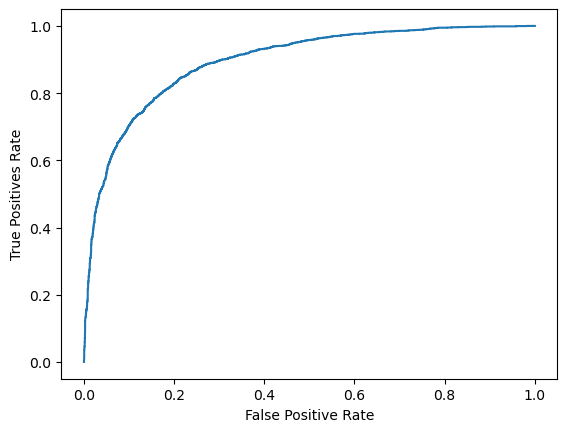

In [18]:
fpr, tpr, threshold = roc_curve(yval, ypred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

In [36]:
xtest = test_df['reviewText']
xtest_transformed = tfidf.transform(xtest)


preds = lr_model.predict(xtest_transformed)

test_ids = list(test_df.index)

subdf = pd.DataFrame({'id':test_ids, 'predicted':preds})
subdf.head(5)

,id,predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [21]:
subdf.to_csv('/Users/Lenovo/Desktop/Education/Winter term/COSC-274/logistic_regression_preds_baseline3.csv', index=False)

## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [21]:
dtc_params = {'criterion':['gini', 'entropy', 'log_loss'], 'class_weight':['balanced'], 'max_depth':[None,3,5,7]}

grid_dtc_model = GridSearchCV(dtc, dtc_params,cv=5, scoring="f1_macro")
grid_dtc_model.fit(x_transformed,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 5, 7]},
             scoring='f1_macro')

In [22]:
print('Best Score : {}'.format(grid_dtc_model.best_score_))
print("Best Parameter : {}".format(grid_dtc_model.best_params_))

Best Score : 0.6861133394492274
Best Parameter : {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None}


In [23]:
print('Score : {}'.format(grid_dtc_model.cv_results_['mean_test_score']))
print("Parameter : {}".format(grid_dtc_model.cv_results_['params']))

Score : [0.68611334 0.54377711 0.6161381  0.62148937 0.68576372 0.54688757
 0.61292411 0.61506446        nan        nan        nan        nan]
Parameter : [{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None}, {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3}, {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5}, {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7}, {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None}, {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3}, {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5}, {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7}, {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': None}, {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 3}, {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 5}, {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 7}]


In [28]:
dtc_model = DecisionTreeClassifier(criterion='gini', class_weight='balanced', max_depth=None)
dtc_model.fit(xtrain, ytrain)

ypred = dtc_model.predict(xval)
ypred_proba = dtc_model.predict_proba(xval)

cfr = classification_report(yval, ypred)
auc = roc_auc_score(yval, ypred)

print("ROC AUC Score : {}".format(auc))
print('Classification Report:\n{}'.format(cfr))

ROC AUC Score : 0.698358587594746
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      3583
           1       0.61      0.67      0.64      2253

    accuracy                           0.71      5836
   macro avg       0.69      0.70      0.69      5836
weighted avg       0.71      0.71      0.71      5836



Text(0, 0.5, 'True Positives Rate')

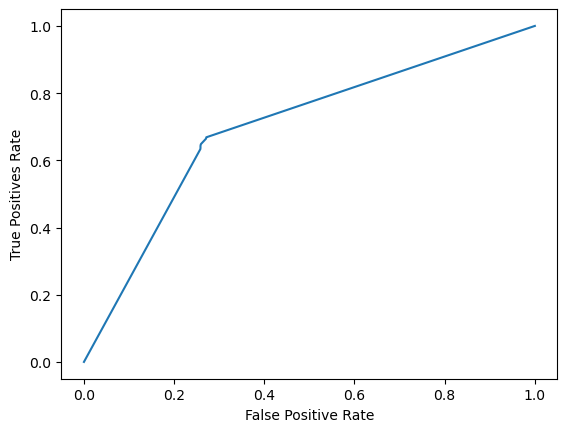

In [29]:
fpr, tpr, threshold = roc_curve(yval, ypred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

In [24]:
preds = grid_dtc_model.predict(xtest_transformed)

test_ids = list(test_df.index)

subdf = pd.DataFrame({'id':test_ids, 'predicted':preds})
subdf.head(5)

,id,predicted
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0


In [25]:
subdf.to_csv('/Users/Lenovo/Desktop/Education/Winter term/COSC-274/decision_tree_baseline3.csv', index=False)

## Extra Tree Classifier

In [24]:
from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier(class_weight='balanced')
etc_params = {'criterion':['gini', 'entropy'], 'max_depth':[None,2,4], 'min_samples_leaf':[1,3,5]}

grid_etc_model = GridSearchCV(etc, etc_params,cv=5, scoring="f1_macro")
grid_etc_model.fit(x_transformed, y)

GridSearchCV(cv=5, estimator=ExtraTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4],
                         'min_samples_leaf': [1, 3, 5]},
             scoring='f1_macro')

In [25]:
print('Best Score : {}'.format(grid_etc_model.best_score_))
print("Best Parameter : {}".format(grid_etc_model.best_params_))

Best Score : 0.6362086729679953
Best Parameter : {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}


In [26]:
print('Score : {}'.format(grid_etc_model.cv_results_['mean_test_score']))
print("Parameter : {}".format(grid_etc_model.cv_results_['params']))

Score : [0.63517872 0.60725706 0.56541182 0.35700624 0.3227627  0.32685239
 0.29216845 0.3069316  0.29006089 0.63620867 0.63091449 0.56641265
 0.30329533 0.32398976 0.30468059 0.28718669 0.30593206 0.34673533]
Parameter : [{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}, {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3}, {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5}, {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}, {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3}, {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}, {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}, {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}, {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5}, {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}, {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3}, {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5}, {'crit

In [22]:
etc_model = ExtraTreeClassifier(criterion='entropy', class_weight='balanced', max_depth=None)
etc_model.fit(xtrain, ytrain)

ypred = etc_model.predict(xval)
ypred_proba = etc_model.predict_proba(xval)

cfr = classification_report(yval, ypred)
auc = roc_auc_score(yval, ypred)

print("ROC AUC Score : {}".format(auc))
print('Classification Report:\n{}'.format(cfr))

ROC AUC Score : 0.67597283071822
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      3583
           1       0.60      0.60      0.60      2253

    accuracy                           0.69      5836
   macro avg       0.68      0.68      0.68      5836
weighted avg       0.69      0.69      0.69      5836



Text(0, 0.5, 'True Positives Rate')

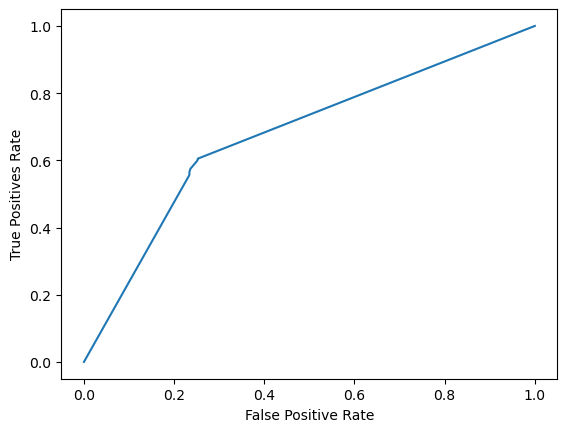

In [23]:
fpr, tpr, threshold = roc_curve(yval, ypred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positives Rate')

In [37]:
preds = grid_etc_model.predict(xtest_transformed)

test_ids = list(test_df.index)

subdf = pd.DataFrame({'id':test_ids, 'predicted':preds})


subdf.to_csv('/Users/Lenovo/Desktop/Education/Winter term/COSC-274/etc_baseline3.csv', index=False)